### Analysis of Piedmont data, by Pietro Terna$^1$ and Stefano Terna$^2$  
$^1$ Univerity of Torino, Italy (retired) & Collegio Carlo Alberto, Italy  
$^2$ PhD, [tomorrowdata.io](https://tomorrowdata.io)

base of tth data https://github.com/pcm-dpc/COVID-19

definitions https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione

In [1]:
import pandas as pd
from datetime import datetime

def parse_date(date):
    return datetime.strptime(date[:10], '%Y-%m-%d')

regions_raw_data = pd.read_csv(
    'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv',
    parse_dates=['data'],
    date_parser=parse_date)

Piedmont_raw_data=regions_raw_data[regions_raw_data.denominazione_regione=='Piemonte']
Piedmont_raw_data=Piedmont_raw_data.rename(columns = {'data': 'dates'},inplace = False)


In [2]:
Piedmont_raw_data.columns

Index(['dates', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note'],
      dtype='object')

# definitions
### from the [Protezione Civile](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md#dati-per-regione) web site [in square brakets my addenda]   
   
**ricoverati_con_sintomi**  
Ricoverati con sintomi - Hospitalised patients with symptoms  

**terapia_intensiva**  
Ricoverati in terapia intensiva	- Intensive Care  
  
**totale_ospedalizzati**  
Totale ospedalizzati - Total hospitalised patients  
  
**isolamento_domiciliare**  
Persone in isolamento domiciliare	Home confinement  
  
**totale_positivi** [stock in a given day]  
Totale attualmente positivi (ospedalizzati + isolamento domiciliare) - Total amount of current positive cases (Hospitalised patients + Home confinement)  
  
**variazione_totale_positivi** [first difference of totale_positivi]  
Variazione del totale positivi (totale_positivi giorno corrente - totale_positivi giorno precedente) - News amount of current positive cases (totale_positivi current day - totale_positivi previous day)  
  
**nuovi_positivi** [first difference of totale_casi]    
Nuovi attualmente positivi (totale_casi giorno corrente - totale_casi giorno precedente) - News amount of current positive cases (totale_casi current day - totale_casi previous day)  
  
**dimessi_guariti**  
Persone dimesse guarite - Recovered  
  
**deceduti**  
Persone decedute - Death  
  
**casi_da_sospetto_diagnostico**  
Casi positivi al tampone emersi da attività clinica - Positive cases emerged from clinical activity  
  
**casi_da_screening**  
Casi positivi emersi da indagini e test, pianificati a livello nazionale o regionale - Positive cases emerging from surveys and tests, planned at national or regional level  
  
**totale_casi** [cumulative value]  
  Totale casi positivi - Total amount of positive cases  
  
**tamponi**  
Totale tamponi - Tests performed  
  
**casi_testati**  
Totale dei soggetti sottoposti al test	Total number of people tested  



# examples and verifications

In [3]:
# beginning of May
Piedmont_raw_data[70:72][['dates','ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati']].head()

,dates,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
1483,2020-05-04,2391,161,2552,13010,15562,-76,192,8874,3186,NaN,NaN,27622,176078,123801.0
1504,2020-05-05,2307,155,2462,12861,15323,-239,152,9235,3216,NaN,NaN,27774,181316,126685.0


In [4]:
# verification 'totale_positivi'='ricoverati_con_sintomi'+'terapia_intensiva'+'isolamento_domiciliare'
2391+161+13010

15562

In [5]:
# verification 'totale_casi'='totale_positivi'+'dimessi_guariti'+'deceduti'
15562+8874+3186

27622

In [6]:
# beginning of November
Piedmont_raw_data[252:253][['dates','ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati']].head()

,dates,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
5305,2020-11-02,3108,196,3304,32791,36095,1681,2003,34153,4415,34275.0,40388.0,74663,1050421,652762.0


In [7]:
# verification 'totale_positivi'='ricoverati_con_sintomi'+'terapia_intensiva'+'isolamento_domiciliare'
3108+196+32791

36095

In [8]:
# verification 'totale_casi'='totale_positivi'+'dimessi_guariti'+'deceduti'
36095+34153+4415

74663

In [9]:
# but also
# verification 'totale_casi'='casi_da_sospetto_diagnostico'+'casi_da_screening'
34275+40388

74663

# Figure 1  
  
  
The introduction of 'casi_da_screening' deeply modifies 'totale_casi' count:   
  
(i) the overrepresentation of positive cases in the tested subjects, due to their charactestics (subject with specific risk profiles);  
  
(ii) tracking screening cases necessarily we find asymptomatic positive persons that in the first phase of the epidemic were not accounted.

<AxesSubplot:title={'center':'Figure 1'}, xlabel='dates'>

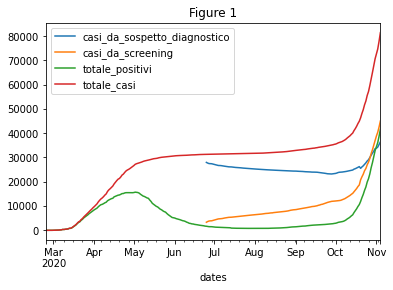

In [10]:
Piedmont_raw_data.plot(x='dates',y=['casi_da_sospetto_diagnostico','casi_da_screening',
                                    'totale_positivi','totale_casi'], title="Figure 1")

# Figure 2

In [11]:
Piedmont_raw_data['totale_casi_no_casi_da_screening']=Piedmont_raw_data['totale_casi'] - \
                                          Piedmont_raw_data['casi_da_screening'].fillna(0)

<AxesSubplot:title={'center':'Figure 2'}, xlabel='dates'>

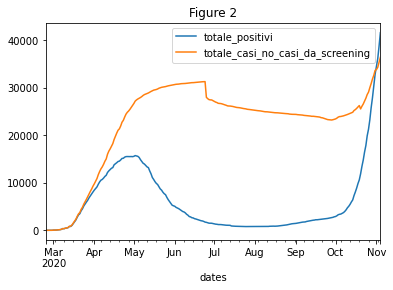

In [12]:
Piedmont_raw_data.plot(x='dates',y=['totale_positivi','totale_casi_no_casi_da_screening'], 
                       title="Figure 2")

# Try to understand the discontinuity, in Figure 2:
### the break is at day 2020-06-03 with 3324 'casi_da_screening'  probably included, with similar amounts, in a segment of the previous days

In [13]:
for i in range(115,130):

    print("%.10s %d %d %d %d %5d %4d %d" % (Piedmont_raw_data[100:130][['dates']].values[0][0], 
Piedmont_raw_data[i:i+1][['totale_positivi']].values[0][0],
Piedmont_raw_data[i:i+1][['dimessi_guariti']].values[0][0],
Piedmont_raw_data[i:i+1][['deceduti']].values[0][0],
Piedmont_raw_data[i:i+1][['totale_casi']].values[0][0],
Piedmont_raw_data[i:i+1][['casi_da_sospetto_diagnostico']].fillna(0).values[0][0],
Piedmont_raw_data[i:i+1][['casi_da_screening']].fillna(0).values[0][0],
Piedmont_raw_data[i:i+1][['totale_casi_no_casi_da_screening']].fillna(0).values[0][0]                                            
))


2020-06-03 2290 24840 4032 31162     0    0 31162
2020-06-03 2178 24971 4039 31188     0    0 31188
2020-06-03 2088 25082 4045 31215     0    0 31215
2020-06-03 2013 25177 4051 31241     0    0 31241
2020-06-03 1970 25223 4055 31248     0    0 31248
2020-06-03 1870 25325 4059 31254     0    0 31254
2020-06-03 1730 25480 4066 31276     0    0 31276
2020-06-03 1681 25544 4071 31296 27972 3324 27972
2020-06-03 1585 25649 4077 31311 27693 3618 27693
2020-06-03 1503 25739 4080 31322 27491 3831 27491
2020-06-03 1495 25756 4085 31336 27436 3900 27436
2020-06-03 1490 25761 4087 31338 27422 3916 27422
2020-06-03 1423 25836 4090 31349 27273 4076 27273
2020-06-03 1353 25921 4091 31365 27132 4233 27132
2020-06-03 1299 25983 4096 31378 26969 4409 26969


# Figure 2b

In [14]:
Piedmont_raw_data['correction']=\
Piedmont_raw_data['casi_da_screening'].fillna(0).where(Piedmont_raw_data['casi_da_screening'].fillna(0)
                                                      ==0, 3324)

Piedmont_raw_data['totale_casi_no_casi_da_screening_coor']=\
Piedmont_raw_data['totale_casi'] - Piedmont_raw_data['casi_da_screening'].fillna(0) + \
Piedmont_raw_data['correction']

<AxesSubplot:title={'center':'Figure 2b'}, xlabel='dates'>

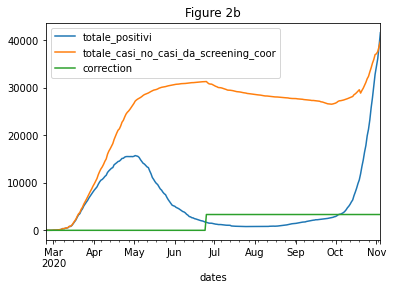

In [15]:
Piedmont_raw_data.plot(x='dates',y=['totale_positivi','totale_casi_no_casi_da_screening_coor',
                                  'correction' ], 
                       title="Figure 2b")

# Figure 3

<AxesSubplot:title={'center':'Figure 3'}, xlabel='dates'>

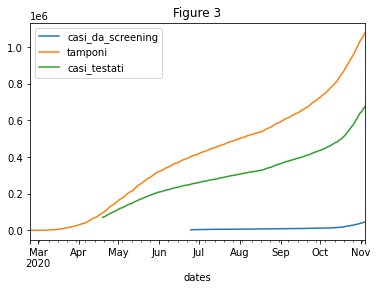

In [16]:
Piedmont_raw_data.plot(x='dates',y=['casi_da_screening',
                                    'tamponi', 'casi_testati'], title="Figure 3")

# Ratios    
### casi_da_screening' / 'casi_testati' with a delay

In [17]:
Piedmont_raw_data[-30:][['dates','casi_da_screening','tamponi', 
                        'casi_testati']].describe()

,casi_da_screening,tamponi,casi_testati
count,30.000000,3.000000e+01,30.000000
mean,23819.100000,8.991813e+05,541012.533333
std,10109.049453,1.005626e+05,70267.735118
min,12572.000000,7.561650e+05,452847.000000
25%,14933.500000,8.100948e+05,480797.250000
50%,21402.500000,8.885935e+05,524285.000000
75%,31097.750000,9.805518e+05,595742.500000
max,45008.000000,1.079137e+06,675549.000000


In [18]:
print(
"Last 30 days ratio 'casi_da_screening' (30 days mean) / 'casi_testati' (30 days mean): %.2f%%" %
       (100 * Piedmont_raw_data[-30:][['dates','casi_da_screening','tamponi', 
                        'casi_testati']].describe().values[1][0] 
       /
              Piedmont_raw_data[-30:][['dates','casi_da_screening','tamponi', 
                        'casi_testati']].describe().values[1][2]) )

Last 30 days ratio 'casi_da_screening' (30 days mean) / 'casi_testati' (30 days mean): 4.40%


In [19]:
delay=5

In [20]:
print("Ratio 'casi_da_screening' %.10s / 'casi_testati' %.10s: %.2f%%" %
      (Piedmont_raw_data[-1:][['dates']].values[0][0],
       Piedmont_raw_data[-1-delay:-delay][['dates']].values[0][0],
       100*Piedmont_raw_data[-1:][['casi_da_screening']].values[0][0] / \
    Piedmont_raw_data[-1-delay:-delay][['casi_testati']].values[0][0]))

Ratio 'casi_da_screening' 2020-11-04 / 'casi_testati' 2020-10-30: 7.22%


<AxesSubplot:title={'center':'Figure 4, ration (%) with shift = dealy'}, xlabel='dates'>

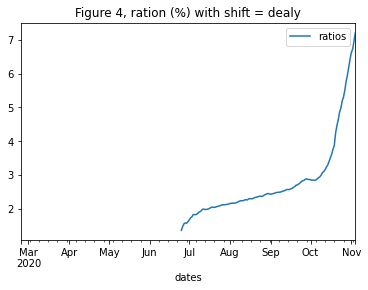

In [21]:
Piedmont_raw_data['ratios']=100*Piedmont_raw_data['casi_da_screening'] / \
    Piedmont_raw_data['casi_testati'].shift(delay)

Piedmont_raw_data.plot(x='dates',y=['ratios'], title="Figure 4, ration (%) with shift = dealy")